# Text Analysis of User Reviews scraped from tripadvisor website

In [2]:
#importing the essentials
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sn
from wordcloud import WordCloud

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
reviews=pd.read_csv('reviews.csv')

In [19]:
reviews.head()

,Site,Review_title,Review_date,Review_paragraph
0,https://www.tripadvisor.in/ShowUserReviews-g30...,Excellent all round,Reviewed 6 January 2019,"Fantastic food, service and atmosphere plus su..."
1,https://www.tripadvisor.in/ShowUserReviews-g30...,Disappointing,Reviewed 17 November 2019,The ambience is very nice and service excellen...
2,https://www.tripadvisor.in/ShowUserReviews-g30...,Fantastic Restaurant,Reviewed 20 November 2018,We had a fantastic lunch at kitchen with a cau...
3,https://www.tripadvisor.in/ShowUserReviews-g30...,Really good place!,Reviewed 17 November 2019,Really good food and amazing staff.
4,https://www.tripadvisor.in/ShowUserReviews-g30...,Amazing food!,Reviewed 5 December 2018,This restaurant is clean the waiters are very ...


In [20]:
reviews.shape

(171, 4)

In [21]:
#Removing the Reviewed text from Review_date
reviews['Review_date'] = reviews['Review_date'].str.replace('Reviewed ', '')
reviews.head()

,Site,Review_title,Review_date,Review_paragraph
0,https://www.tripadvisor.in/ShowUserReviews-g30...,Excellent all round,6 January 2019,"Fantastic food, service and atmosphere plus su..."
1,https://www.tripadvisor.in/ShowUserReviews-g30...,Disappointing,17 November 2019,The ambience is very nice and service excellen...
2,https://www.tripadvisor.in/ShowUserReviews-g30...,Fantastic Restaurant,20 November 2018,We had a fantastic lunch at kitchen with a cau...
3,https://www.tripadvisor.in/ShowUserReviews-g30...,Really good place!,17 November 2019,Really good food and amazing staff.
4,https://www.tripadvisor.in/ShowUserReviews-g30...,Amazing food!,5 December 2018,This restaurant is clean the waiters are very ...


In [0]:
review_titles=reviews['Review_title']
review_text=reviews['Review_paragraph']

In [23]:
# Remove punctuation
review_text= review_text.map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
review_text= review_text.map(lambda x: x.lower())
# Print out the first rows of papers
review_text.head()

0    fantastic food service and atmosphere plus sup...
1    the ambience is very nice and service excellen...
2    we had a fantastic lunch at kitchen with a cau...
3                   really good food and amazing staff
4    this restaurant is clean the waiters are very ...
Name: Review_paragraph, dtype: object

In [24]:
#Analysing the Number of words in review text
count = review_text.str.split().apply(len).value_counts()
count.index = 'Reviews with ' + count.index.astype(str) + ' words:'
count[:10]

Reviews with 41 words:    6
Reviews with 23 words:    5
Reviews with 22 words:    5
Reviews with 35 words:    5
Reviews with 42 words:    5
Reviews with 24 words:    5
Reviews with 46 words:    5
Reviews with 19 words:    4
Reviews with 31 words:    4
Reviews with 30 words:    4
Name: Review_paragraph, dtype: int64

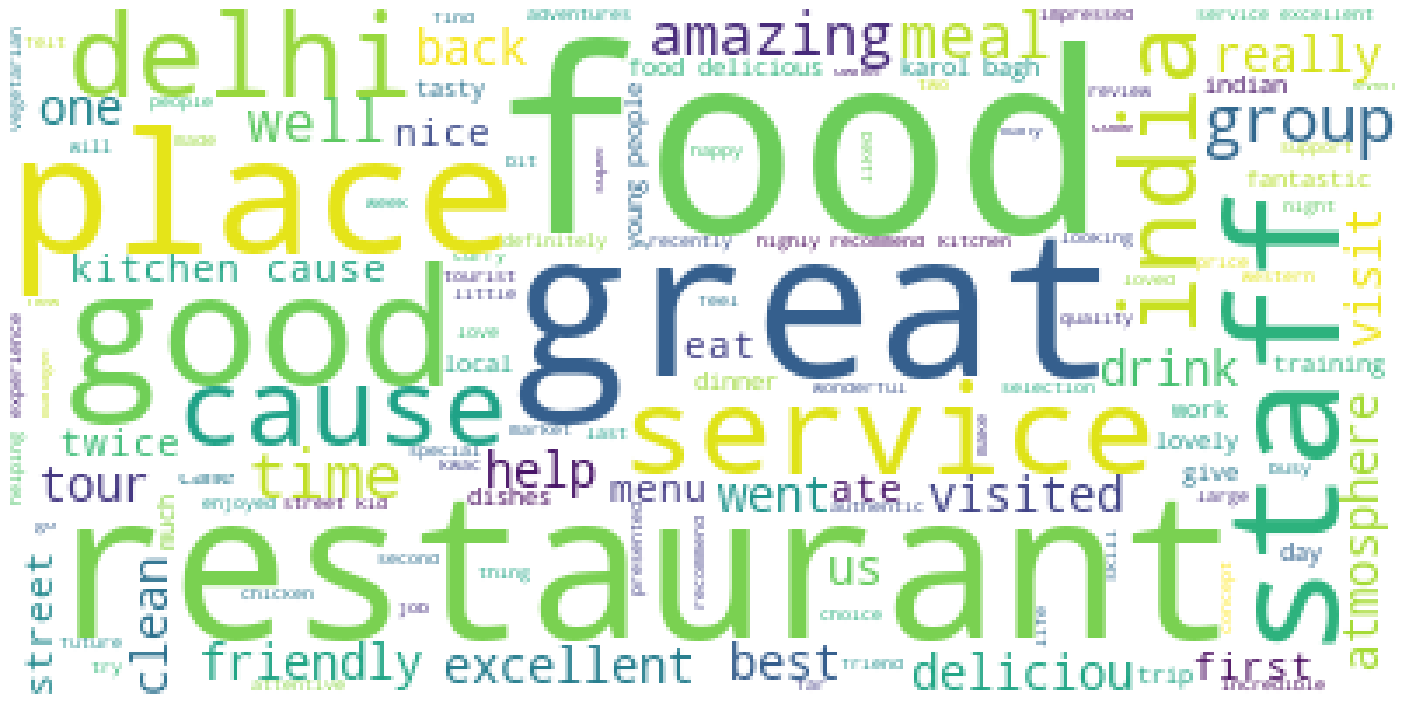

In [25]:
wordcloud =  WordCloud(background_color="white").generate(' '.join(review_text))
# Generate plot
plt.figure( figsize=(25,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [0]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

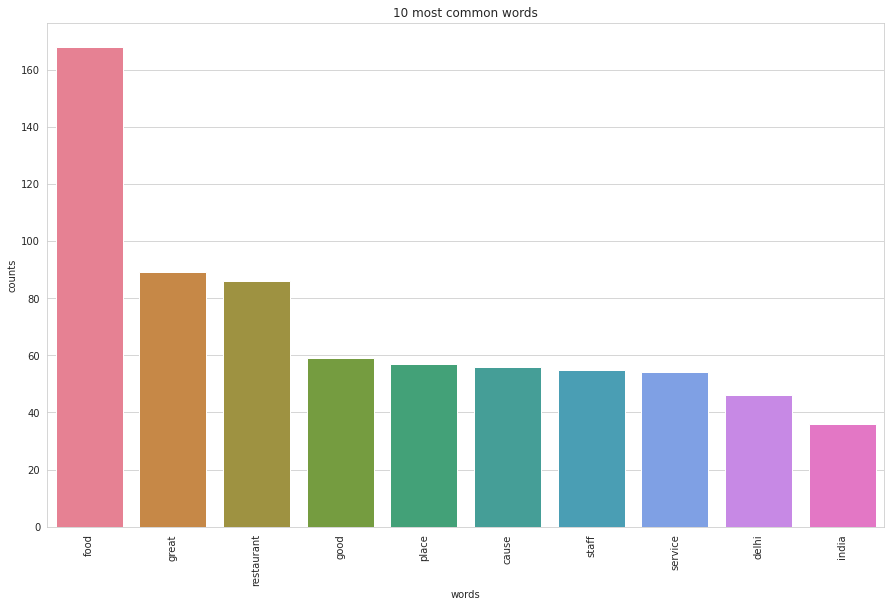

In [28]:
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(review_text)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [0]:
words = review_text.str.lower().replace('[^A-Za-z\s<>]+', '')

In [30]:
import string
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

for i in range(len(words)):
    word_tokens = word_tokenize(words[i]) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [w for w in filtered_sentence if not w in string.punctuation] 
    words[i]=filtered_sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


words contains the list of words in each review

In [32]:
frequency={}
for i in words:
    for w in i:
        if w.isalpha(): # to check whether the word list consists of all alphabets
            if w not in frequency:
                frequency[w] = 1  #initial frequency of the word
            else:
                frequency[w] += 1 # for existing words, increment by 1
                
freqwords=sorted(frequency.items(),  key=lambda x: x[1], reverse=True) # using sorted function to sort the words 
print("Words with the highest frequency are : ")
freqwords[:10]

Words with the highest frequency are : 


[('food', 167),
 ('great', 89),
 ('restaurant', 86),
 ('good', 59),
 ('place', 57),
 ('cause', 56),
 ('service', 54),
 ('staff', 54),
 ('delhi', 46),
 ('india', 36)]

## Analysing the sentiment of the reviews

### Installing flair nlp: state-of-the-art currently

In [14]:
pip install --upgrade git+https://github.com/flairNLP/flair.git

  Cloning https://github.com/flairNLP/flair.git to /tmp/pip-req-build-06sgczqm
  Running command git clone -q https://github.com/flairNLP/flair.git /tmp/pip-req-build-06sgczqm
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 798kB 8.6MB/s 
     |████████████████████████████████| 573kB 30.0MB/s 
     |████████████████████████████████| 256kB 36.3MB/s 
     |████████████████████████████████| 983kB 39.5MB/s 
     |████████████████████████████████| 890kB 46.7MB/s 
     |████████████████████████████████| 3.7MB 50.6MB/s 
     |████████████████████████████████| 1.0MB 53.3MB/s 
  Created wheel for flair: filename=flair-0.4.5-cp36-none-any.whl size=138783 sha256=c115dcb6a32f87b5711492cffd52f3d44dcbc6c543eb1613dc5e74e84cb0037a
  Stored in directory: /tmp/pip-ephem-wheel-cache-n3a11uvg/wheels/84/82/73/d2b3b59b7be74ea05f2c6d64132efe27df52daffb47d1dc7bb
Successfully built flair
  Crea

### Training the custom Text Classification model in flair using Glove embeddings and TREC_6 corpus

In [15]:
from flair.data import Corpus
from flair.datasets import TREC_6
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer


# getting the corpus
corpus: Corpus = TREC_6()

# create the label dictionary
label_dict = corpus.make_label_dictionary()

# make a list of word embeddings
word_embeddings = [WordEmbeddings('glove'),

                   # comment in flair embeddings for state-of-the-art results
                   # FlairEmbeddings('news-forward'),
                   # FlairEmbeddings('news-backward'),
                   ]

# initialize document embedding by passing list of word embeddings
# Can choose between many RNN types (GRU by default, to change use rnn_type parameter)
document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
                                                                     hidden_size=512,
                                                                     reproject_words=True,
                                                                     reproject_words_dimension=256,
                                                                     )

# create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)

# initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

# 7. start the training
trainer.train('resources/taggers/ag_news',
              learning_rate=0.1,
              mini_batch_size=32,
              anneal_factor=0.5,
              patience=5,
              max_epochs=150)

2020-04-29 06:21:23,336 https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label not found in cache, downloading to /tmp/tmpokjbb2dp


100%|██████████| 335858/335858 [00:00<00:00, 822269.88B/s]

2020-04-29 06:21:24,090 copying /tmp/tmpokjbb2dp to cache at /root/.flair/datasets/trec_6/original/train_5500.label
2020-04-29 06:21:24,091 removing temp file /tmp/tmpokjbb2dp


2020-04-29 06:21:24,434 https://cogcomp.seas.upenn.edu/Data/QA/QC/TREC_10.label not found in cache, downloading to /tmp/tmpm_ti8wil


100%|██████████| 23354/23354 [00:00<00:00, 282342.05B/s]

2020-04-29 06:21:24,861 copying /tmp/tmpm_ti8wil to cache at /root/.flair/datasets/trec_6/original/TREC_10.label
2020-04-29 06:21:24,862 removing temp file /tmp/tmpm_ti8wil
2020-04-29 06:21:24,878 Reading data from /root/.flair/datasets/trec_6
2020-04-29 06:21:24,879 Train: /root/.flair/datasets/trec_6/train.txt
2020-04-29 06:21:24,879 Dev: None
2020-04-29 06:21:24,880 Test: /root/.flair/datasets/trec_6/test.txt
2020-04-29 06:21:24,939 Computing label dictionary. Progress:



100%|██████████| 5407/5407 [00:01<00:00, 3463.28it/s]

2020-04-29 06:21:26,593 [b'ABBR', b'DESC', b'NUM', b'HUM', b'ENTY', b'LOC']


2020-04-29 06:21:26,661 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpc1kjwi66


100%|██████████| 160000128/160000128 [00:01<00:00, 81668490.30B/s]

2020-04-29 06:21:28,743 copying /tmp/tmpc1kjwi66 to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2020-04-29 06:21:29,041 removing temp file /tmp/tmpc1kjwi66
2020-04-29 06:21:29,117 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim not found in cache, downloading to /tmp/tmpduejd5yu


100%|██████████| 21494764/21494764 [00:00<00:00, 56603257.75B/s]

2020-04-29 06:21:29,624 copying /tmp/tmpduejd5yu to cache at /root/.flair/embeddings/glove.gensim


2020-04-29 06:21:29,656 removing temp file /tmp/tmpduejd5yu


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


2020-04-29 06:21:46,887 ----------------------------------------------------------------------------------------------------
2020-04-29 06:21:46,888 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
    )
    (word_reprojection_map): Linear(in_features=100, out_features=256, bias=True)
    (rnn): GRU(256, 512, batch_first=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=6, bias=True)
  (loss_function): CrossEntropyLoss()
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2020-04-29 06:21:46,890 ----------------------------------------------------------------------------------------------------
2020-04-29 06:21:46,896 Corpus: "Corpus: 4907 train + 545 dev + 500 test sentences"
2020-04-29 06:21:46,898 ----------------------------------------------------------------------------------------------------
2020-04-29 06:21:4

/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


2020-04-29 06:21:48,214 epoch 1 - iter 15/154 - loss 1.75650731 - samples/sec: 482.69
2020-04-29 06:21:48,945 epoch 1 - iter 30/154 - loss 1.72987649 - samples/sec: 1136.12
2020-04-29 06:21:49,443 epoch 1 - iter 45/154 - loss 1.70818621 - samples/sec: 1038.88
2020-04-29 06:21:50,049 epoch 1 - iter 60/154 - loss 1.68932966 - samples/sec: 852.35
2020-04-29 06:21:50,644 epoch 1 - iter 75/154 - loss 1.66569362 - samples/sec: 870.51
2020-04-29 06:21:51,153 epoch 1 - iter 90/154 - loss 1.66018843 - samples/sec: 1014.29
2020-04-29 06:21:51,678 epoch 1 - iter 105/154 - loss 1.64542329 - samples/sec: 983.64
2020-04-29 06:21:52,224 epoch 1 - iter 120/154 - loss 1.63413293 - samples/sec: 946.23
2020-04-29 06:21:52,734 epoch 1 - iter 135/154 - loss 1.61807603 - samples/sec: 1028.65
2020-04-29 06:21:53,219 epoch 1 - iter 150/154 - loss 1.60536495 - samples/sec: 1052.22
2020-04-29 06:21:53,433 ----------------------------------------------------------------------------------------------------
2020-0

{'dev_loss_history': [1.4010090827941895,
  1.2111555337905884,
  1.2595020532608032,
  1.3233705759048462,
  1.135024905204773,
  0.868666410446167,
  0.8831512331962585,
  0.6929432153701782,
  0.8747208714485168,
  0.6279212236404419,
  0.6756790280342102,
  0.6195156574249268,
  0.5226816534996033,
  0.6174725294113159,
  0.5009506344795227,
  0.5161781311035156,
  0.4864911139011383,
  0.4421234726905823,
  0.4243185222148895,
  0.5076770186424255,
  0.42118215560913086,
  0.4436713755130768,
  0.45656701922416687,
  0.4051457941532135,
  0.3676721453666687,
  0.4048088788986206,
  0.34010279178619385,
  0.3367275297641754,
  0.3230111300945282,
  0.33049097657203674,
  0.34689807891845703,
  0.3182658553123474,
  0.3215799629688263,
  0.3658650815486908,
  0.36428871750831604,
  0.2997683882713318,
  0.31417056918144226,
  0.32420215010643005,
  0.33991745114326477,
  0.2880377769470215,
  0.2868237793445587,
  0.28224554657936096,
  0.2772037088871002,
  0.2736157178878784,
  0.

In [16]:
# loading the best fit model
classifier = TextClassifier.load('resources/taggers/ag_news/final-model.pt')

2020-04-29 06:38:42,729 loading file resources/taggers/ag_news/final-model.pt


In [0]:
from flair.data import Sentence
sentence = Sentence(review_text[0])

In [34]:
classifier.predict(sentence)

[Sentence: "fantastic food service and atmosphere plus supporting an excellent cause i have been here four times already and plan to go again on my return leg through delhi chicken tikka masala is excellent and there is a great range of food for all tastes it’s clean the staff are efficient and helpful thanks to g adventures for the introduction"   [− Tokens: 59  − Sentence-Labels: {'class': [ENTY (0.9990)]}]]

In [35]:
print(sentence.labels)

[ENTY (0.9990)]


Note: We can simply get the sentiment of the sentence using ***sentence.labels***




### Testing using some built in polarity identifier

In [37]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 7.7MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    return sentiment_dict['neg'], sentiment_dict['neu'], sentiment_dict['pos'], sentiment_dict['compound']
    

In [0]:
neg_scores=[]
neu_scores=[]
pos_scores=[]
compound_scores=[]
for i in review_text:
    a,b,c,d=sentiment_scores(i)
    neg_scores.append(a)
    neu_scores.append(b)
    pos_scores.append(c)
    compound_scores.append(d)

In [0]:
pos,neg,neu=0,0,0
for compound_value in compound_scores:
    if  compound_value>= 0.05 : 
        pos+=1 
  
    elif compound_value <= - 0.05 : 
        neg+=1 
    else : 
        neu+=1 

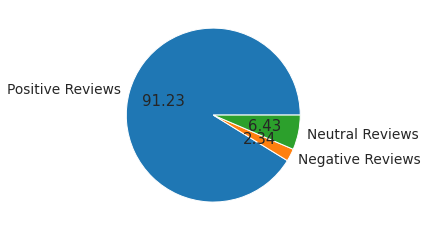

In [47]:
plt.figure()
values = [pos, neg, neu] 
labels = ['Positive Reviews', 'Negative Reviews', 'Neutral Reviews'] 
plt.pie(values, labels=labels, autopct='%.2f')
plt.show()

In [40]:
review_text[compound_scores.index(min(compound_scores))]

"all 5 star reviews for a restaurant should give people a cause to be concerned like many other westerners who have reviewed this restaurant we also went there for dinner because we thought the place was doing some good the food took ages to arrive was overpriced and not to local standards- more like tesco packaged food that the western palate is used to especially the shahi paneer which was full of sugar and red colouring it had no cashew paste traditional spices or ghee i grew up locally so i should know what authentic food tastes like we did not pay for it as we could not eat (but this took some convincing) my hakka noodles were okay though the other paneer we ordered was to give my son stomach problems in the morning the ambience was poor with bad acoustics- some timber palettes hung from the ceiling which obviously the designer of the restaurant had seen in some trendy western restaurant but in this case had been specially made as an architect i though the layout was very poor the

### Most negative review:
"all 5 star reviews for a restaurant should give people a cause to be concerned like many other westerners who have reviewed this restaurant we also went there for dinner because we thought the place was doing some good the food took ages to arrive was overpriced and not to local standards- more like tesco packaged food that the western palate is used to especially the shahi paneer which was full of sugar and red colouring it had no cashew paste traditional spices or ghee i grew up locally so i should know what authentic food tastes like we did not pay for it as we could not eat (but this took some convincing) my hakka noodles were okay though the other paneer we ordered was to give my son stomach problems in the morning the ambience was poor with bad acoustics- some timber palettes hung from the ceiling which obviously the designer of the restaurant had seen in some trendy western restaurant but in this case had been specially made as an architect i though the layout was very poor there was a family getting drunk and making a lot of noise but the manager was too timid to stop them but more worryingly we did not get proper answers about their charitable cause we were told that they supported street kids but i did not see a charity registration number we did not see any street kids there and their first 'intern' who has given an interview on their facebook page doesn't give any details of what he learned he doesn't appear to a be street kid but a well educated adult i talked to some street kinds in the area and they had never heard of this restaurant and neither had the local business association we never went there again but instead visited the authentic south indian restaurant next door (we also saw some of kwac staff there) daily we watched hordes of naive western people going there thinking they were helping the poor by eating the terrible overpriced food you might be better off giving the money to a registered charity and eating authentic food somewhere else instead"

In [41]:
review_text[compound_scores.index(max(compound_scores))]

"my mum and i went to this restaurant twice during our 2 separate stays in delhi precisely because we loved it so much we found the food very reasonably priced super tasty and the staff totally wonderful they offer such a variety of food to choose from and i love how super trendy and relaxing the restaurant is their is such a lovely atmosphere and i really liked knowing the ethos behind the restaurant and the training of the teenagers who had been street children to progress further super recommend you will not be disappointed attaching just a couple of photos i took which doesn't do the place or the wonderful food justice"

### Most positive review:
my mum and i went to this restaurant twice during our 2 separate stays in delhi precisely because we loved it so much we found the food very reasonably priced super tasty and the staff totally wonderful they offer such a variety of food to choose from and i love how super trendy and relaxing the restaurant is their is such a lovely atmosphere and i really liked knowing the ethos behind the restaurant and the training of the teenagers who had been street children to progress further super recommend you will not be disappointed attaching just a couple of photos i took which doesn't do the place or the wonderful food justice

In [42]:
review_text[neu_scores.index(max(neu_scores))]

'went here for dinner today'

### Most neutral review:
went here for dinner today